# Importing Libraries


In [22]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


### Adjusting Parameter for Image visualisation


In [23]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200


# Understanding the Dataset


### Loading the Dataset


In [24]:
data = pd.read_csv('Dataset/application_data.csv')
print("The Dimension of the Datset is : ", data.shape, " rows x columns")
data.head(5)


The Dimension of the Datset is :  (307511, 122)  rows x columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Box plots of all features for each TARGET( 0: Not Risky to grant Loan, 1: Risky to grant Loan)


In [26]:
box_plot_df = data.select_dtypes(exclude=['object'])
for col in box_plot_df:
    if (col == 'TARGET'):
        continue
    
    fig, ax = plt.subplots(figsize=(14, 10))
    box_plot_df.boxplot(column=[col], by='TARGET', ax=ax)
    plt.savefig("Boxplots/"+col+"_boxplot.png", transparent = False)
    plt.close()


### Density vs AMT_ANNUITY


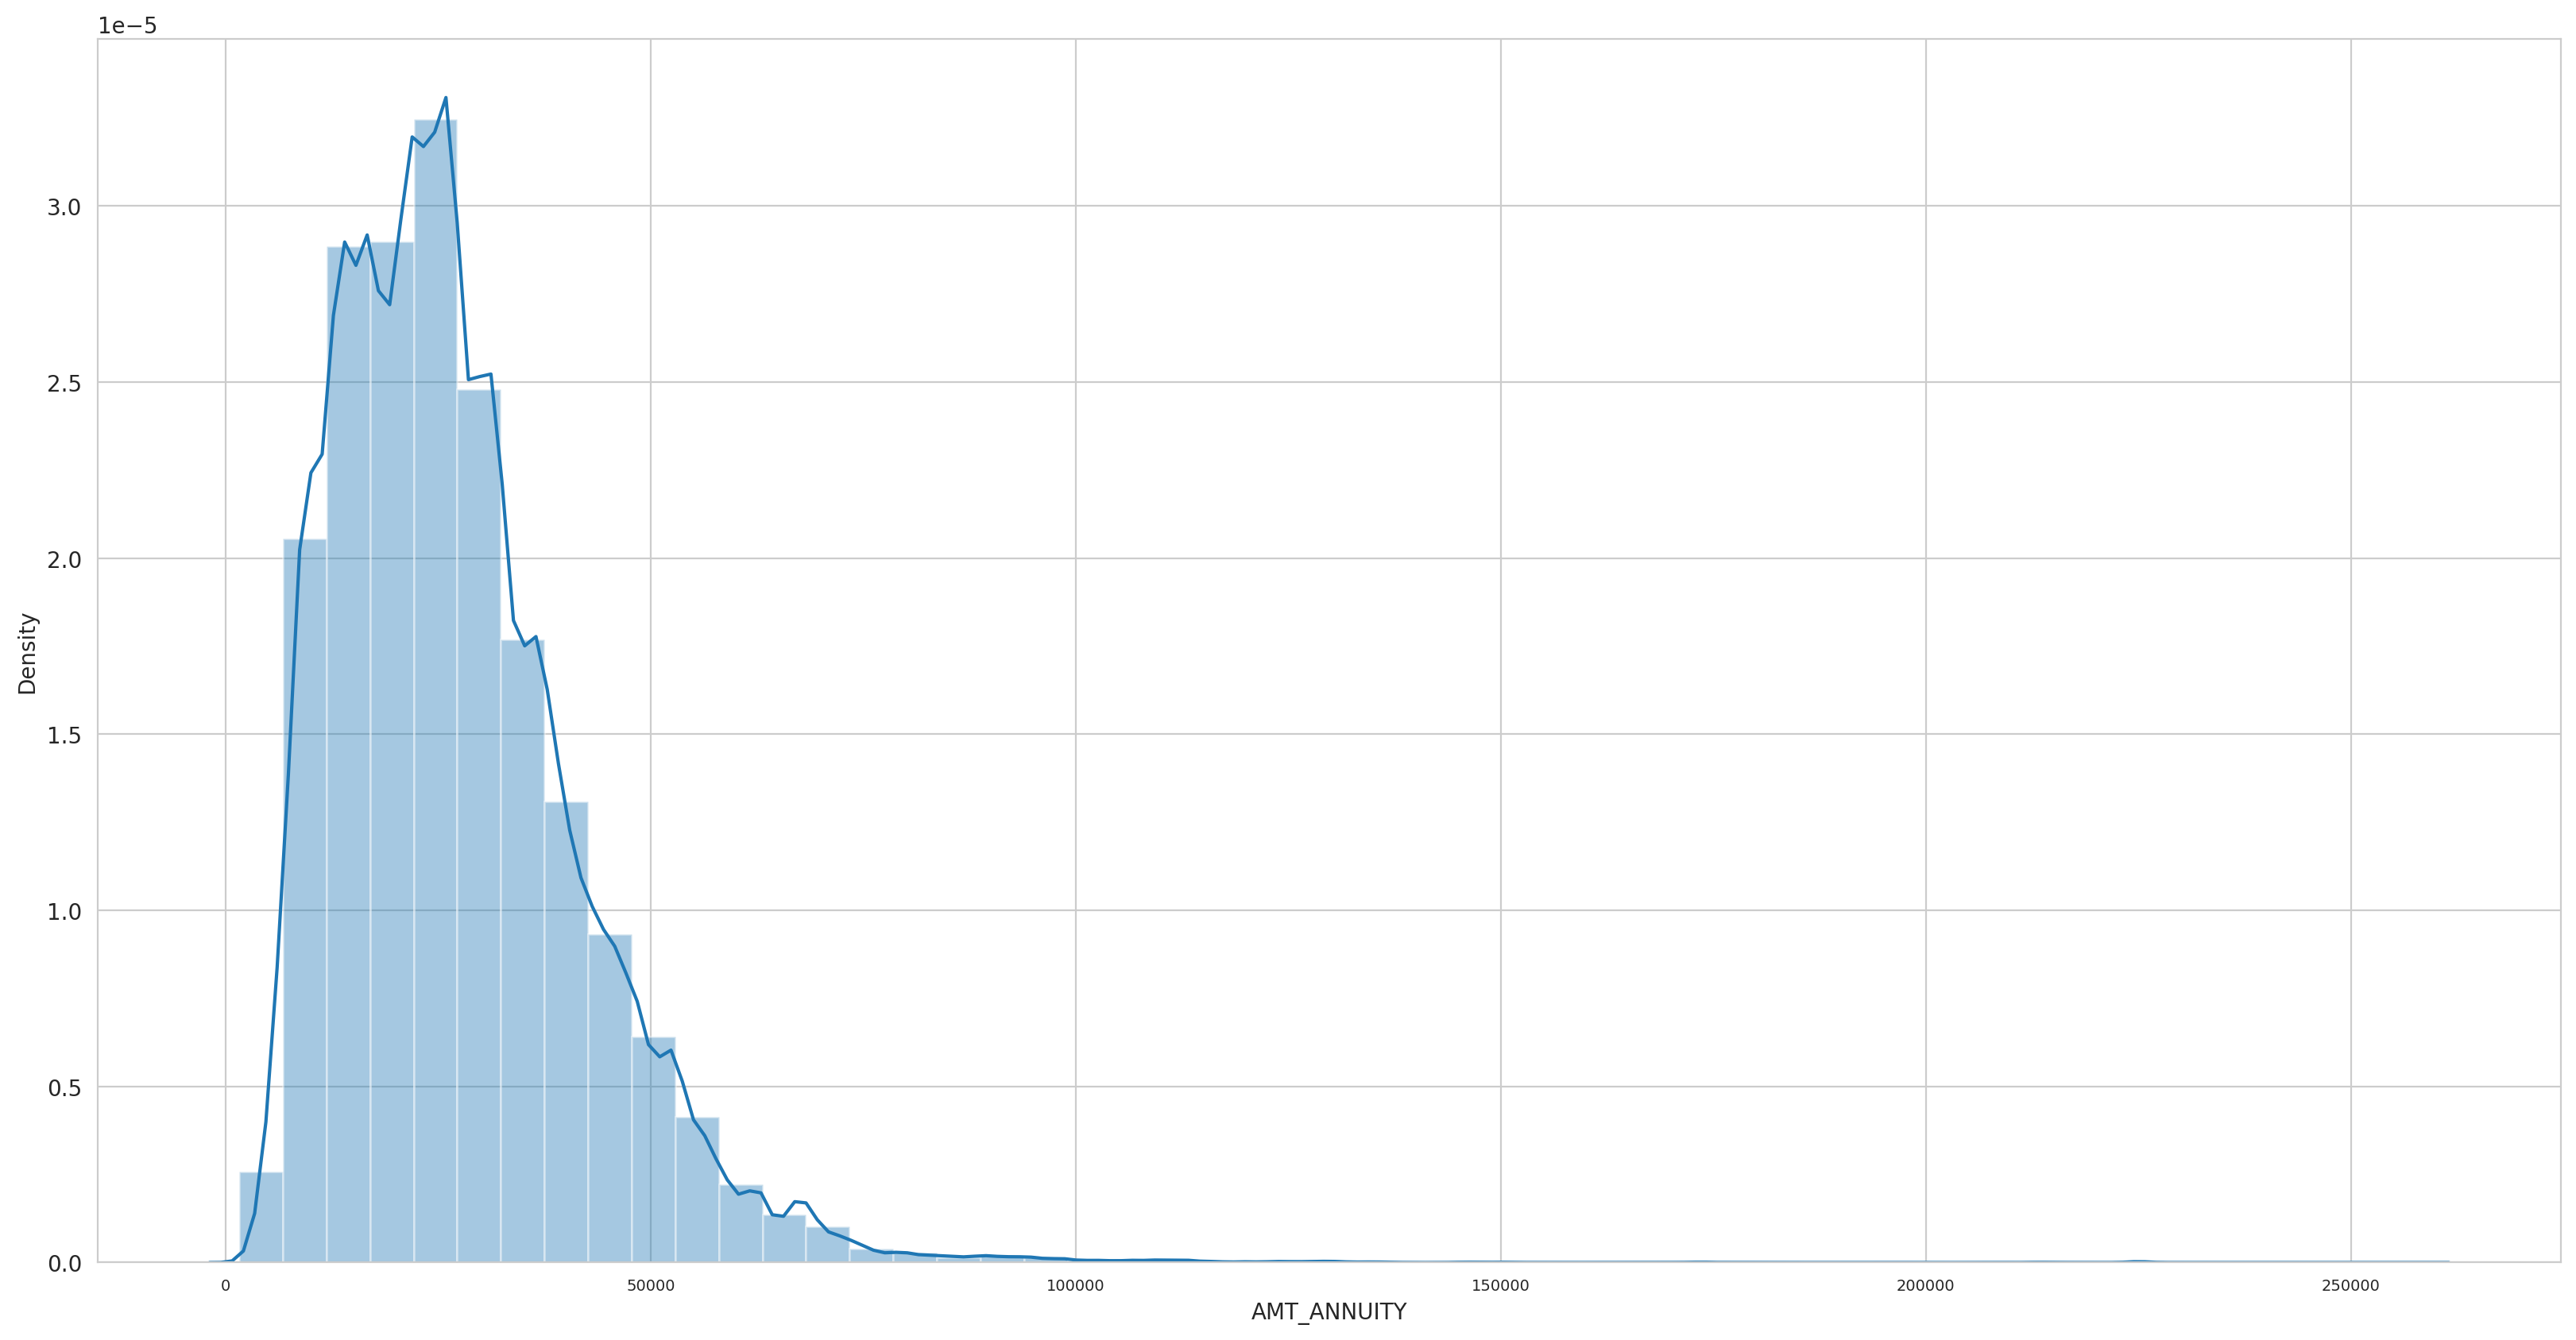

In [27]:
sns.set_style('whitegrid')
sns.distplot(data['AMT_ANNUITY'])
plt.savefig('Plots/densityVSamtnuity.png')
plt.show()
plt.close()


### Columns vs NanCounts


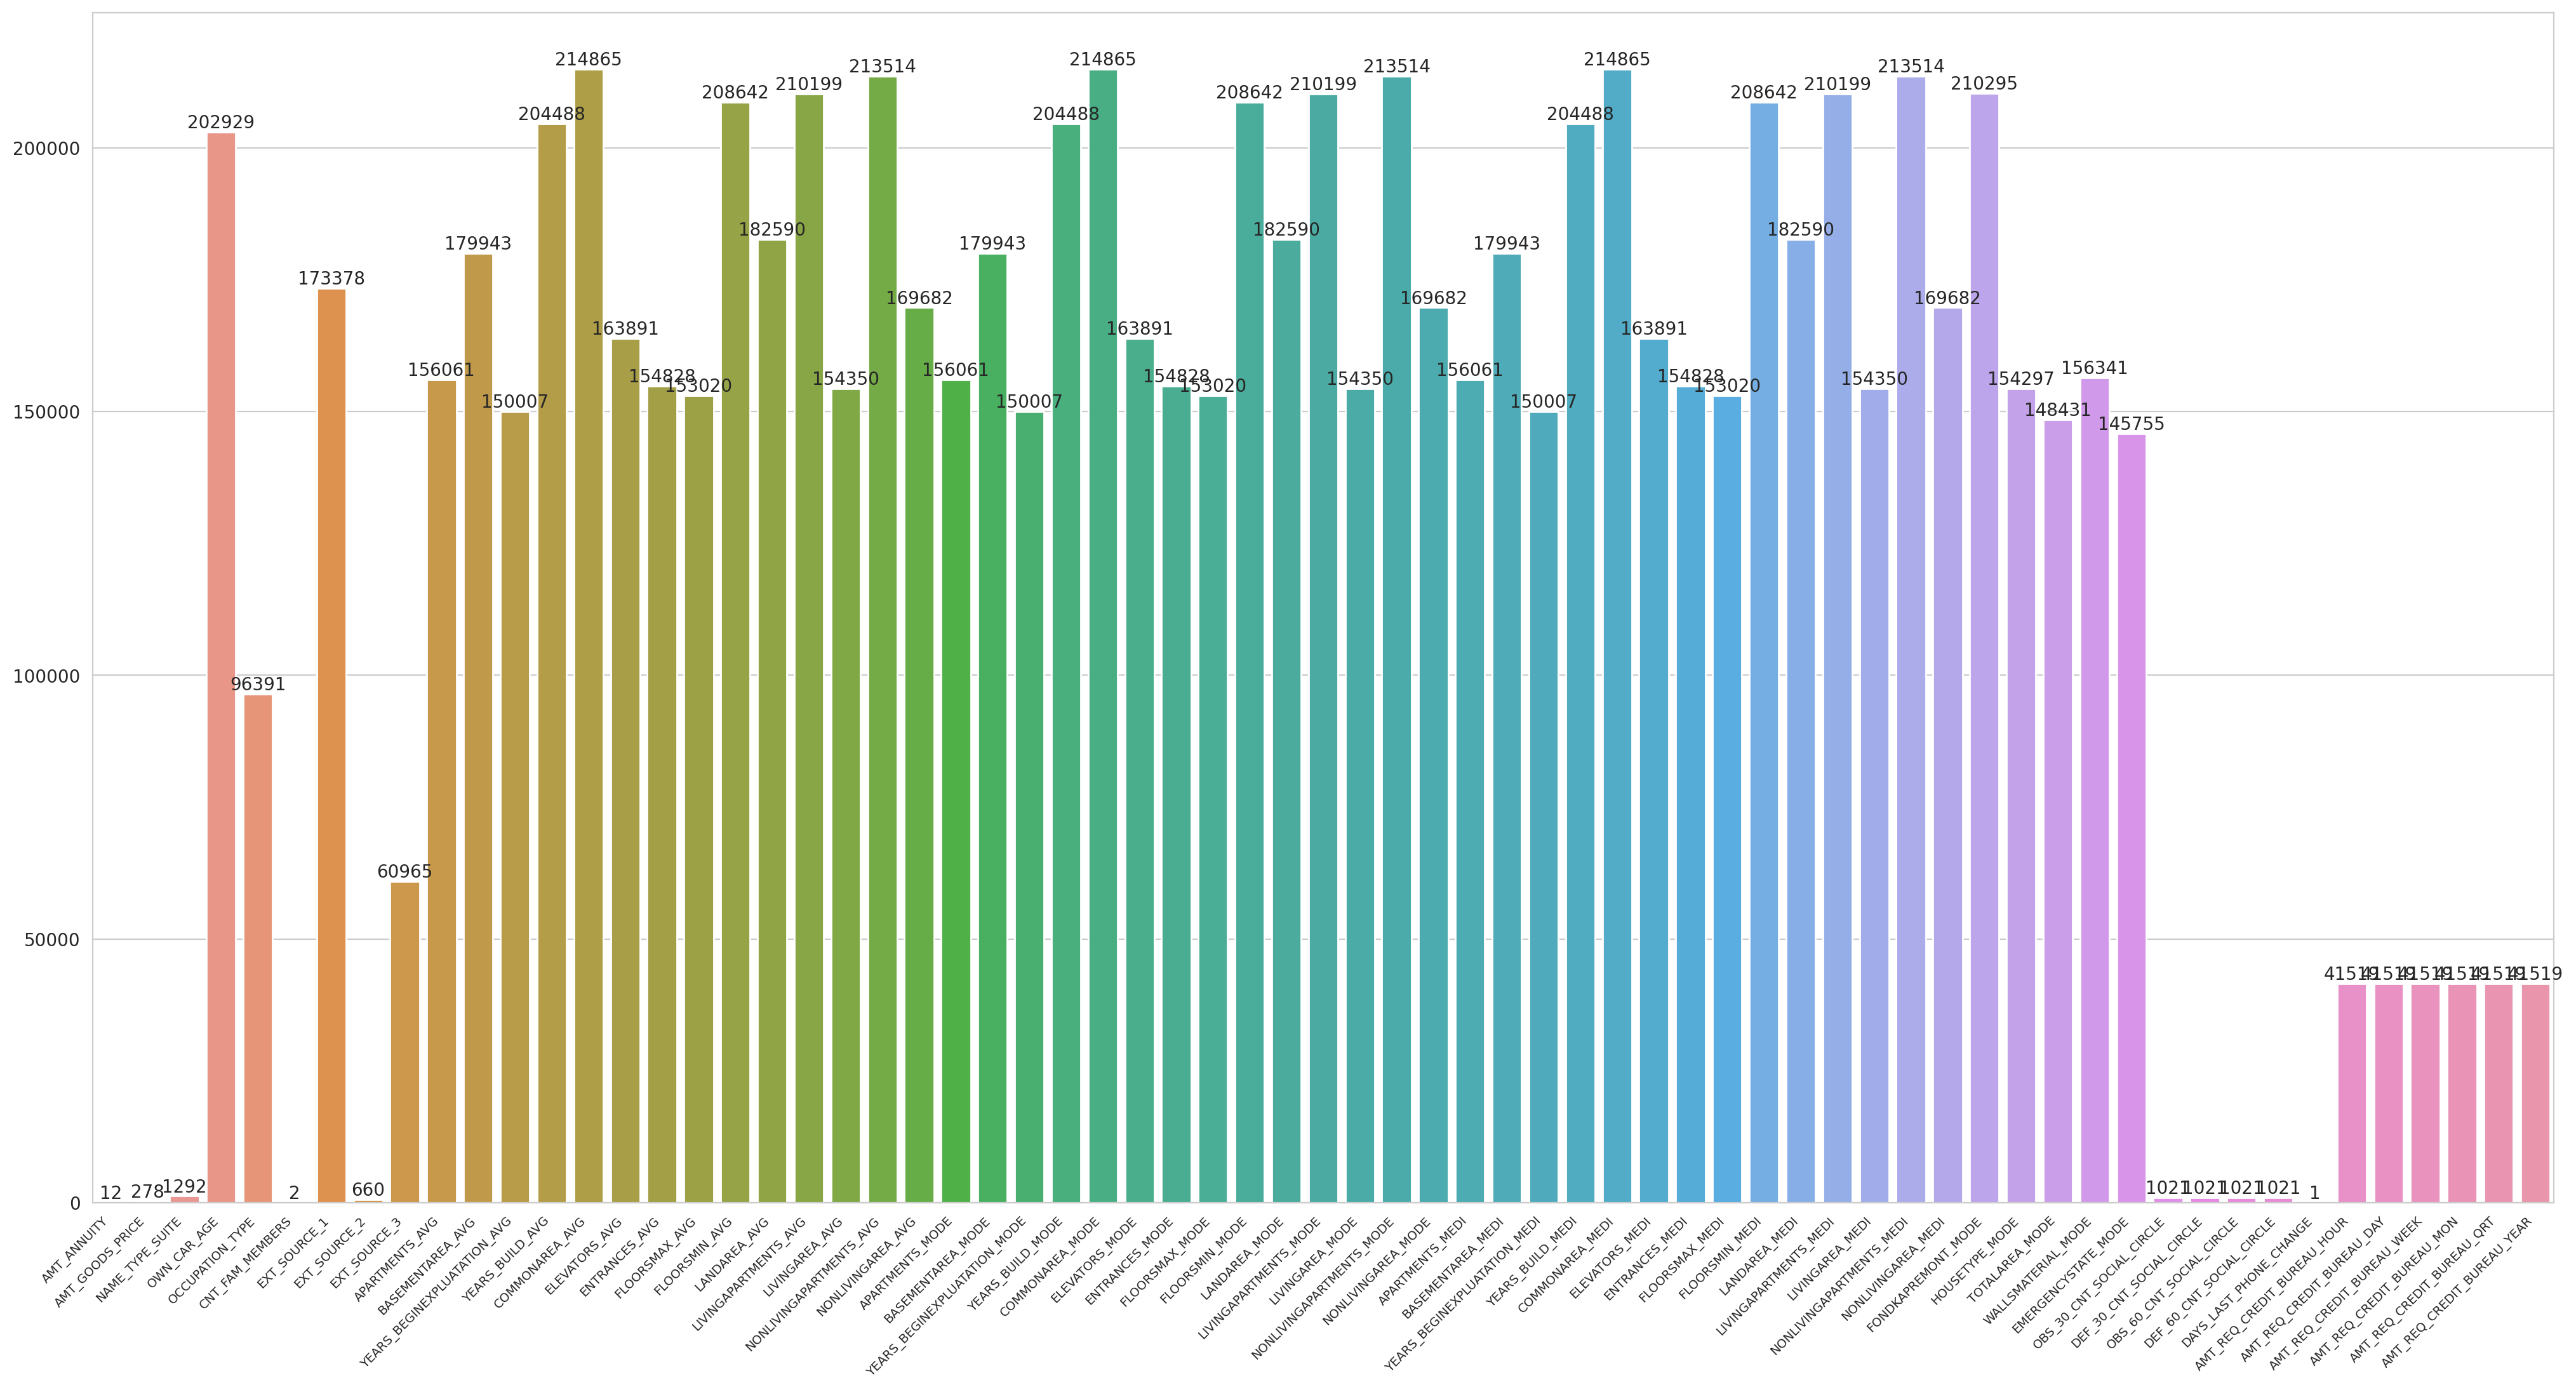

In [28]:
nanCount, colArr = [], []
for col in list(data.columns)[2:]:
    if sum(data[col].isna()) > 0:
        nanCount.append(sum(data[col].isna()))
        colArr.append(col)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
ax = sns.barplot(x=colArr, y=nanCount)
ax.bar_label(ax.containers[0])
plt.savefig('Plots/columnsVsNanCount.png')
plt.show()
plt.close()


### Columns vs Nan_Count_Percentage


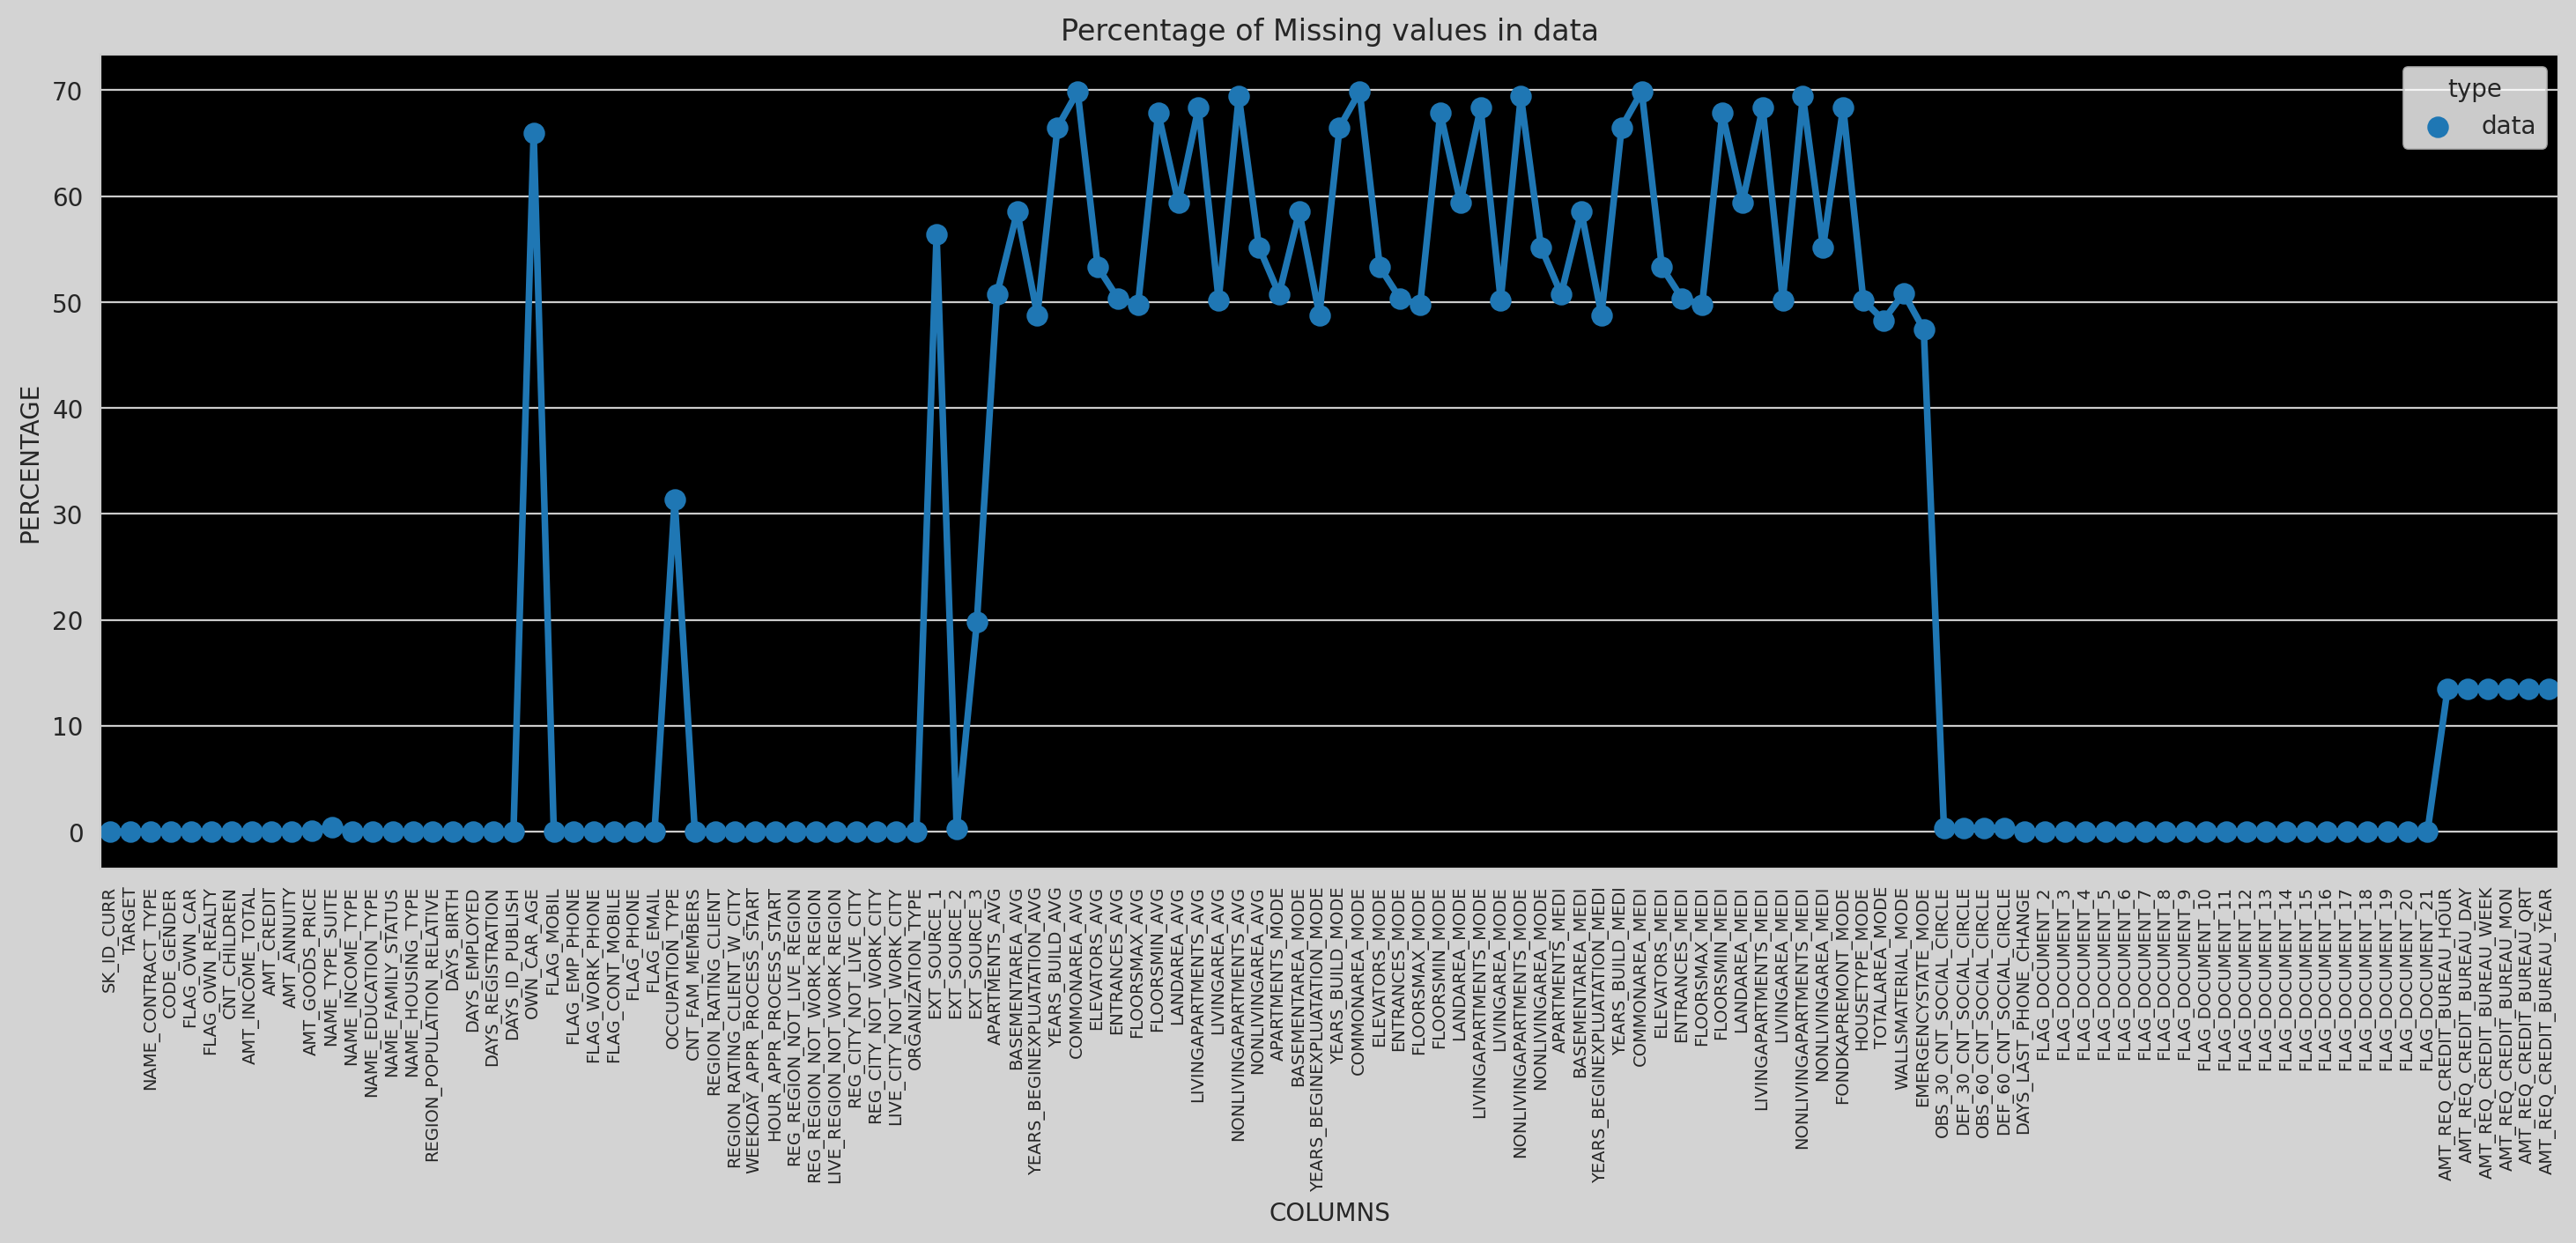

In [29]:
fig = plt.figure(figsize=(18, 6))
miss_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
miss_data["type"] = "data"
ax = sns.pointplot("index", 0, data=miss_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.savefig('Plots/columnsVsNanCouuntPercentage.png')
plt.show()
plt.close()


### HeatMap


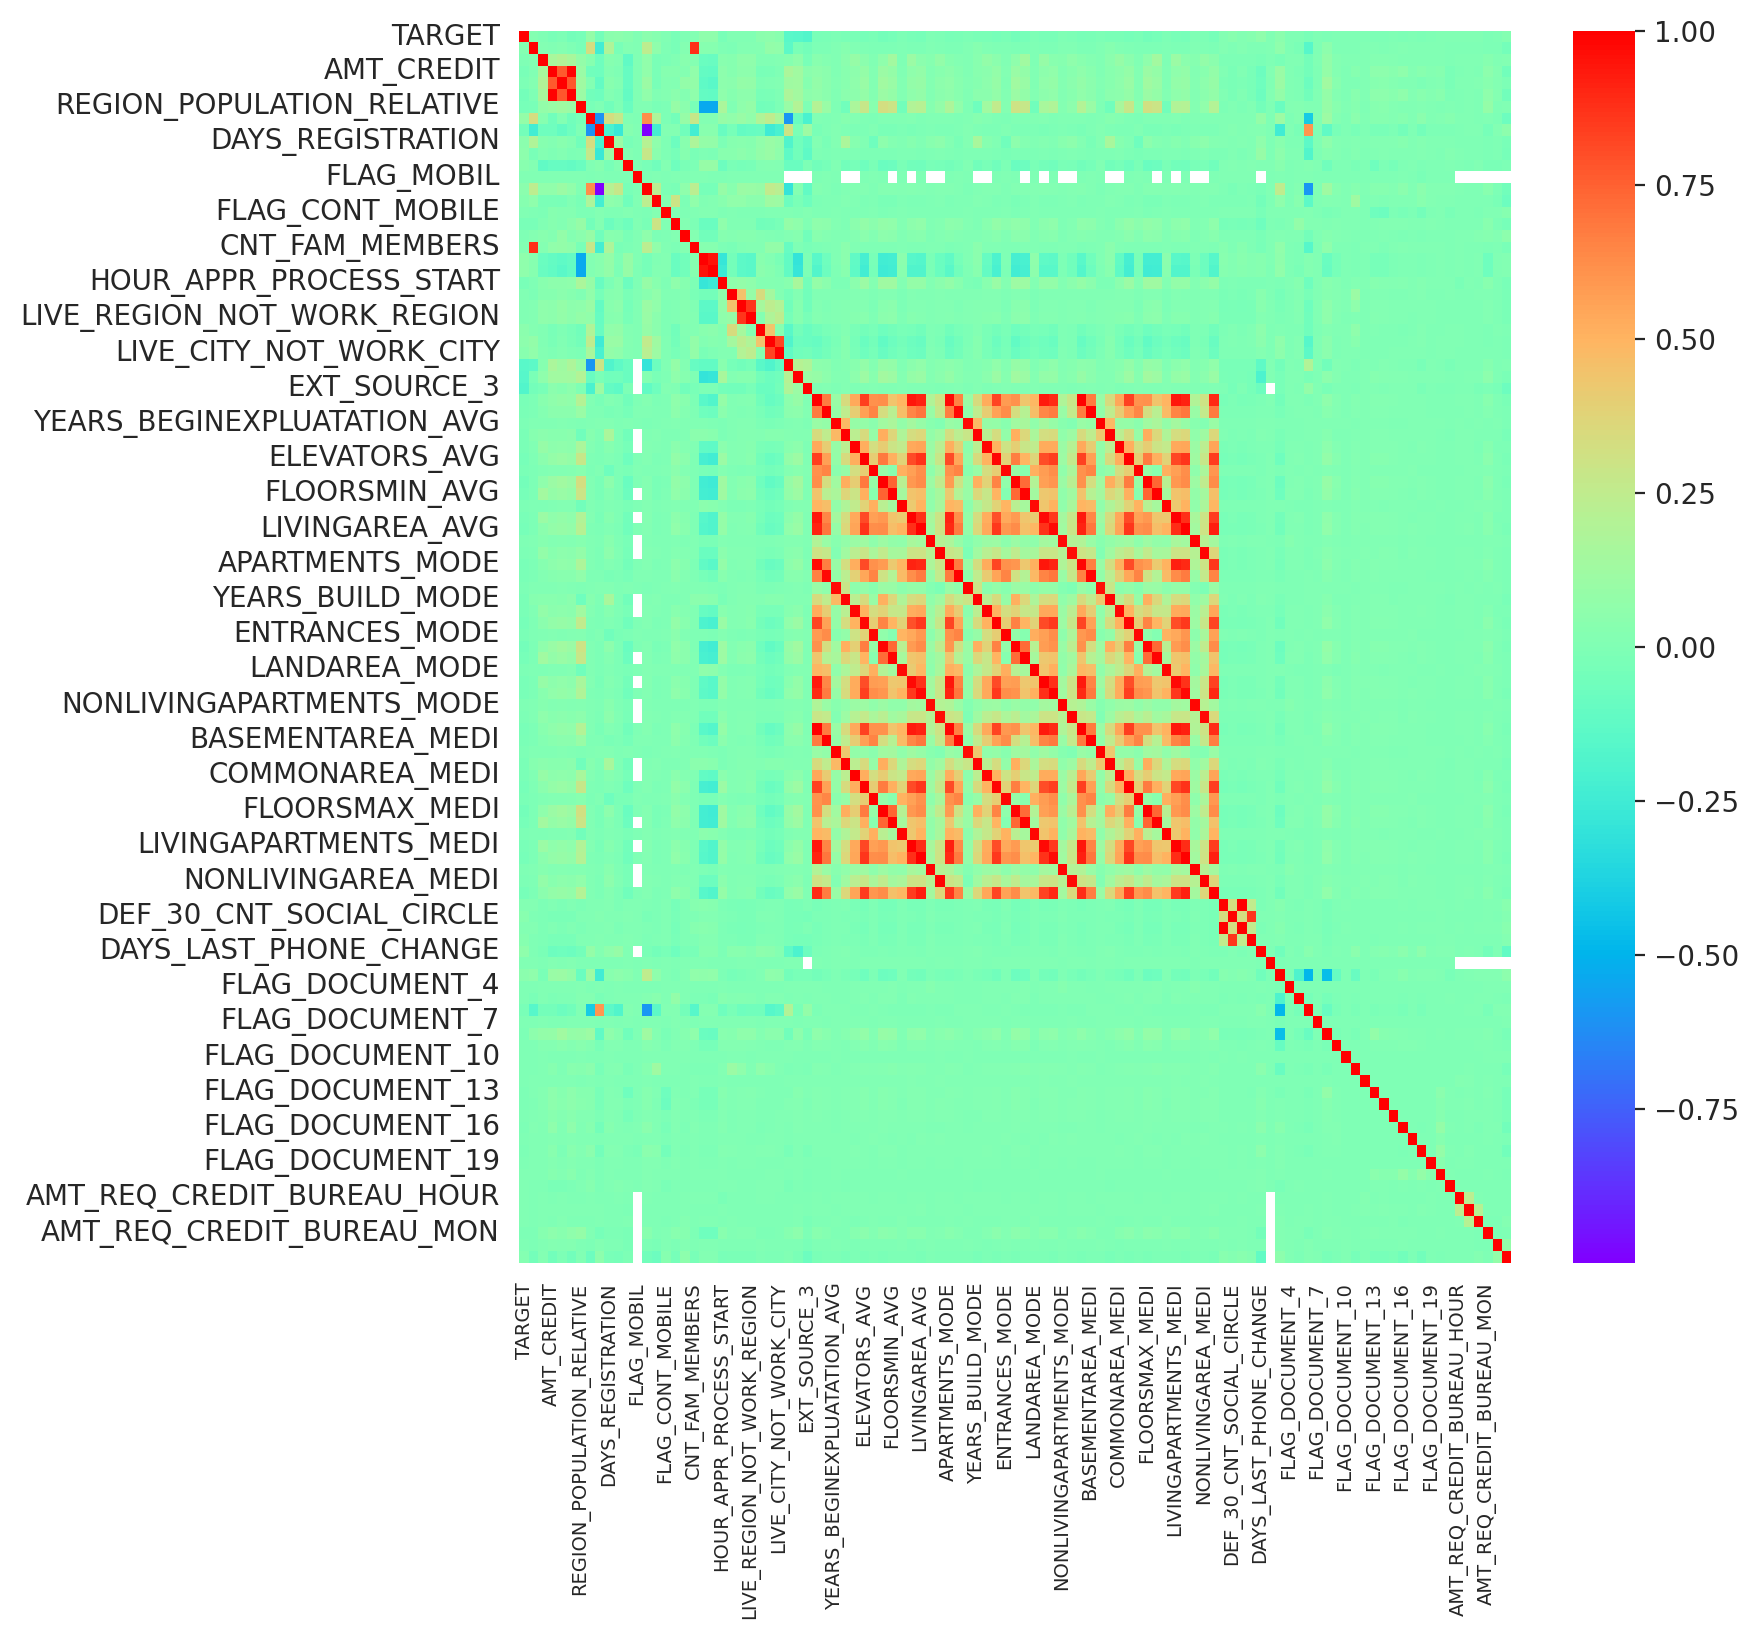

In [30]:
corrmat = data.iloc[:, 1:].corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow")
plt.savefig('Plots/heatMap.png')
plt.show()
plt.close()


In [31]:
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = pd.DataFrame(corrdf['Correlation']).round(2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.head(10)


,Var1,Var2,Correlation
105,CNT_CHILDREN,TARGET,0.02
210,AMT_INCOME_TOTAL,TARGET,0.00
211,AMT_INCOME_TOTAL,CNT_CHILDREN,0.01
315,AMT_CREDIT,TARGET,0.03
316,AMT_CREDIT,CNT_CHILDREN,0.00
317,AMT_CREDIT,AMT_INCOME_TOTAL,0.16
420,AMT_ANNUITY,TARGET,0.01
421,AMT_ANNUITY,CNT_CHILDREN,0.02
422,AMT_ANNUITY,AMT_INCOME_TOTAL,0.19
423,AMT_ANNUITY,AMT_CREDIT,0.77


In [32]:
print(np.unique(corrdf['Correlation'].values))


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.65 0.66 0.67 0.68 0.69 0.72
 0.73 0.74 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


### We will analyse our columns using its min value and max value


In [33]:
minMaxCount = {}
for col in list(data.columns)[2:]:
    if data[col].dtype == 'float64':
        c = [int(data[col].min()), int(data[col].max())]
        if c[0] == 0 or c[1] == 0:
            continue
        minMaxCount[col] = c


minMaxCount = pd.DataFrame.from_dict(
    minMaxCount, orient='index', columns=['Min', 'Max'])
min(minMaxCount['Min']), max(minMaxCount['Max'])


(1, 117000000)

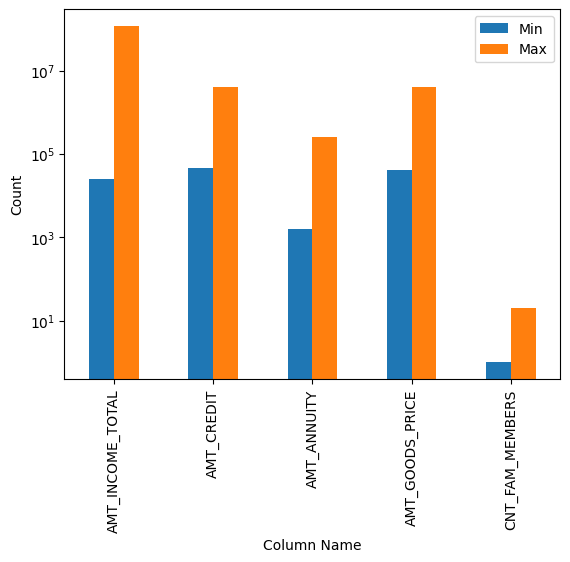

In [34]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
ax = minMaxCount.plot(kind='bar', xlabel="Column Name", ylabel='Count')
plt.yscale('log')
plt.savefig('Plots/minMaxColumns.png')
plt.show()


### Target column Description of respective people are risky or not in granting loans


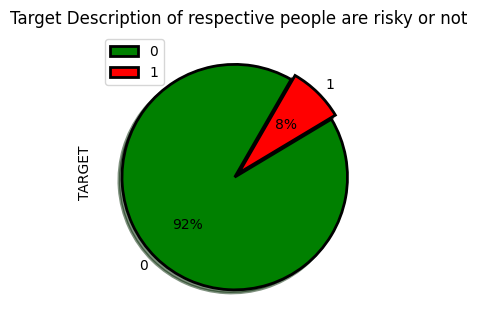

In [42]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(121)
data["TARGET"].value_counts().plot.pie(autopct="%1.0f%%", colors=["g", "r"], startangle=60,
                                       wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.05, 0], shadow=True)
plt.legend()
plt.title("Target Description of respective people are risky or not")
plt.savefig('Plots/pieChartTarget.png',bbox_inches='tight')
plt.show()


### Distribution of client owing a car


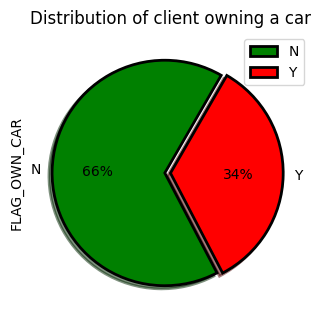

In [44]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct="%1.0f%%", colors=["g", "r"], startangle=60,
                                             wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.05, 0], shadow=True)
plt.title("Distribution of client owning a car")
plt.legend()
plt.savefig('Plots/OwingCar.png',bbox_inches='tight')
plt.show()


### Distribution of client by their Gender


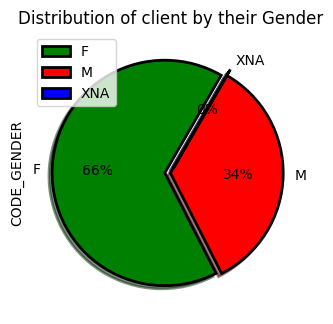

In [45]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(121)
data["CODE_GENDER"].value_counts().plot.pie(autopct="%1.0f%%", colors=["g", "r", "b"], startangle=60,
                                            wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.05, 0, 0.05], shadow=True)
plt.legend()
plt.title("Distribution of client by their Gender")
plt.savefig('Plots/Gender.png',bbox_inches='tight')
plt.show()
plt.close()


### Distribution of client by contract types


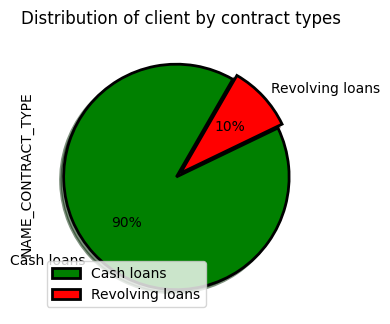

In [46]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(121)
data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct="%1.0f%%", colors=["g", "r"], startangle=60,
                                                   wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.05, 0], shadow=True)
plt.legend()
plt.title("Distribution of client by contract types")
plt.savefig('Plots/Contract_type.png',bbox_inches='tight')
plt.show()
plt.close()


### Peak hours for week Day


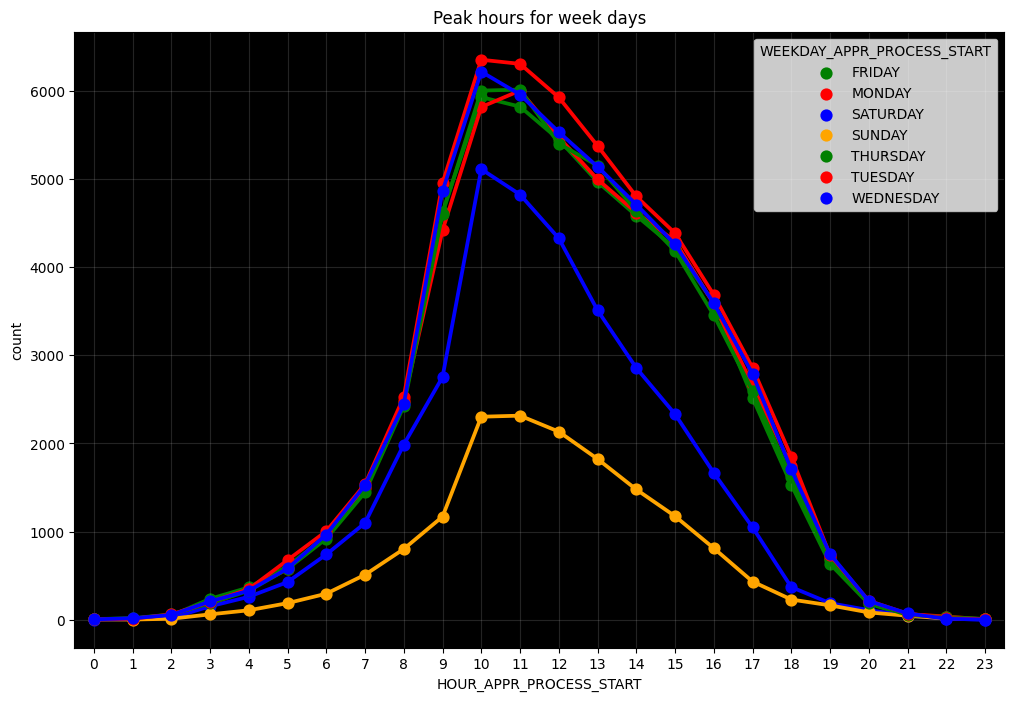

In [47]:
hr = pd.crosstab(data["HOUR_APPR_PROCESS_START"],
                 data["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12, 8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"], hr[0],
                   hue=hr["WEEKDAY_APPR_PROCESS_START"], palette=["g", "r", "b", "orange"], scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True, alpha=.2)
plt.savefig('Plots/peak_hours.png')
plt.show()
plt.close()
